In [1]:
import numpy as np
import tensorflow as tf
import PIL

from matplotlib import pyplot as plt
from sklearn.datasets import load_sample_images

/home/cecil/apps/anaconda3/envs/ds/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
dataset = np.array(load_sample_images().images, dtype=np.float32)

/home/cecil/apps/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/cecil/apps/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [17]:
batch_size, height, width, channels = dataset.shape

In [40]:
type(dataset)

numpy.ndarray

In [18]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [32]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convo = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
#with Max pool layer
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
#with AVG pool layer
avg_pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

In [33]:
with tf.Session() as sess:
    output = sess.run(convo, feed_dict={X: dataset})
    out_mp = sess.run(max_pool, feed_dict={X: dataset})
    out_ap = sess.run(avg_pool, feed_dict={X: dataset})

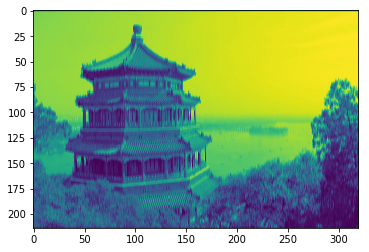

In [34]:
plt.imshow(output[0,:,:,0])

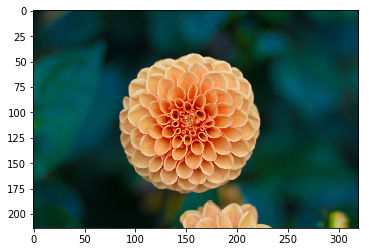

In [37]:
plt.imshow(out_mp[1].astype(np.uint8))

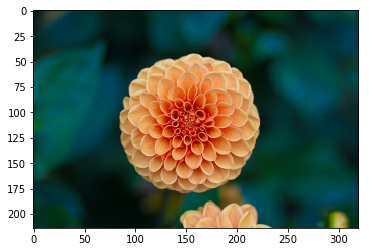

In [38]:
plt.imshow(out_ap[1].astype(np.uint8))

In [39]:
plot_image(fmap[:, :, 0, 0])

NameError: name 'plot_image' is not defined

In [ ]:
plt.imshow(dataset[0])

In [ ]:
dataset[0].shape